In [11]:
from ctypes import*
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mydll = windll.LoadLibrary('C:/Users/droid/Projects/6sem_Cpp_and_unix/lab2/C++/for_python/shared_lib.dll')

mydll.func.restype = c_double

In [8]:

def func(x):
    return x ** 2 - x ** 2 + x * 4 - x * 5 + x + x

def time_exp(n, x):
    time = timeit.timeit(stmt='func(x)', globals={"func": func, "x": x}, number=n)
    return time

In [32]:
x = np.random.random()
cppx = c_double(x)

gen = range(1000000, 10000001, 500000)

times_py = list(time_exp(n, x) for n in gen)
times_cpp = list(mydll.func(cppx, n) for n in gen)

ns = list(gen)

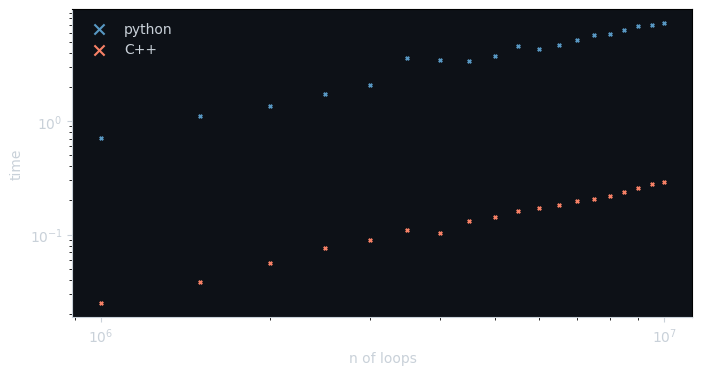

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

ax.scatter(ns, times_py, marker='x', s=6, c='#5898C3', label='python')
ax.scatter(ns, times_cpp, marker='x', s=6, c='#F78166', label='C++')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n of loops')
ax.set_ylabel('time')

ax.spines['left'].set_color('#C9D1D9')
ax.spines['bottom'].set_color('#C9D1D9')

ax.set_facecolor('#0D1117')
ax.tick_params(colors='#C9D1D9')

ax.yaxis.label.set_color('#C9D1D9')
ax.xaxis.label.set_color('#C9D1D9')

ax.legend(labelcolor='#C9D1D9', markerscale=3, frameon=False)
plt.savefig('conclusion.png', edgecolor='#0D1117', dpi=400, facecolor='black', transparent=True)